In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("Fraud_Detection.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [10]:
print(data.columns.values)

['step' 'type' 'amount' 'nameOrig' 'oldbalanceOrg' 'newbalanceOrig'
 'nameDest' 'oldbalanceDest' 'newbalanceDest' 'isFraud' 'isFlaggedFraud']


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [12]:
### missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

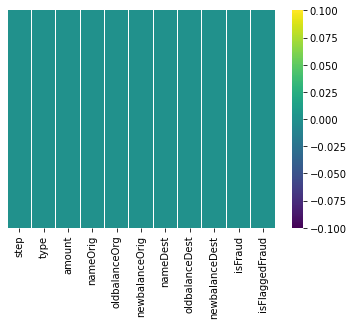

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

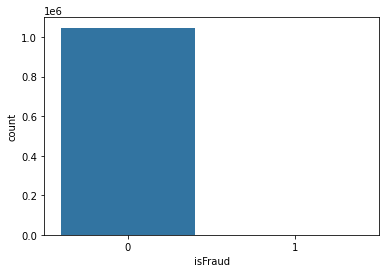

In [16]:
# data analysis : display survivors and Non Survivors
sns.countplot(x="isFraud",data=data)

<AxesSubplot:ylabel='Frequency'>

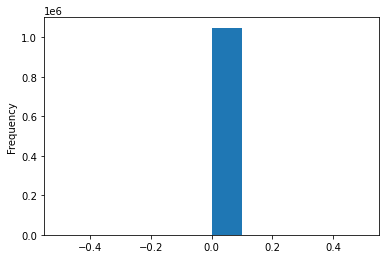

In [17]:
data["isFlaggedFraud"].plot.hist()

In [24]:
# create dummies for categorical independent variables
pd.get_dummies(data["type"])

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1048570,0,1,0,0,0
1048571,0,0,0,1,0
1048572,0,0,0,1,0
1048573,0,0,0,1,0


In [25]:
# we have to check whether dummies have been created or not
pd.get_dummies(data["type"],drop_first=True)

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
1048570,1,0,0,0
1048571,0,0,1,0
1048572,0,0,1,0
1048573,0,0,1,0


In [26]:
type=pd.get_dummies(data['type'],drop_first=True)
type.head(5)

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [27]:
data=pd.concat([data,type],axis=1)

In [34]:
data.drop(['type'],axis=1,inplace=True)
data.head(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [35]:
x=data.drop("isFraud",axis=1)
y=data['isFlaggedFraud']
print(x)

         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1    9839.64  C1231006815      170136.00       160296.36   
1           1    1864.28  C1666544295       21249.00        19384.72   
2           1     181.00  C1305486145         181.00            0.00   
3           1     181.00   C840083671         181.00            0.00   
4           1   11668.14  C2048537720       41554.00        29885.86   
...       ...        ...          ...            ...             ...   
1048570    95  132557.35  C1179511630      479803.00       347245.65   
1048571    95    9917.36  C1956161225       90545.00        80627.64   
1048572    95   14140.05  C2037964975       20545.00         6404.95   
1048573    95   10020.05  C1633237354       90605.00        80584.95   
1048574    95   11450.03  C1264356443       80584.95        69134.92   

            nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  \
0        M1979787155            0.00            0.00           

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()

In [40]:
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'C227438603'

In [ ]:
prediction=logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)